# STUDYING DIMENSIONALITY REDUCTION USING PCA, LLE AND OTHERS

# Imports

In [228]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.pipeline import Pipeline
from sklearn.manifold import MDS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import warnings
warnings.filterwarnings("ignore")

In [229]:
data = fetch_openml('mnist_784', version=1, as_frame=False)
data.target = data.target.astype(np.uint8)

# Splitting into Test and Training Data

In [230]:
X = data["data"]
y = data["target"]

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

print("Shape of X_train", X_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train (52500, 784)
Shape of X_test (17500, 784)
Shape of y_train (52500,)
Shape of y_test (17500,)


# Concept - Explained Variance Ratio

We have to reduce dimensions but also preserve the variance of the dataset to avoid too much information loss.

## To find the number of dimension/components needed to preserve 95% of the variance

In [232]:
pca = PCA() #PCA with n_components not specified
pca.fit(X_train)
cumulative_sum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumulative_sum >= 0.95) + 1

print("Original number of dimensions -", X_train.shape[1])
print("Number of dimensions we need to preserve 95% variance -", dim)
print("Percent of dimentions needed - ", 100*(dim/X_train.shape[1]).round(2))

Original number of dimensions - 784
Number of dimensions we need to preserve 95% variance - 154
Percent of dimentions needed -  20.0


As seen, we just need 20% of the features to preserve almost 95% of the total variance

## Explained Variance Ratio vs No. of Principal Components

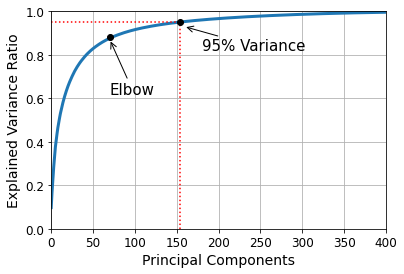

In [233]:
plt.figure(figsize=(6,4))
plt.plot(cumulative_sum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.plot([dim, dim], [0, 0.95], "r:")
plt.plot([0, dim], [0.95, 0.95], "r:")
plt.plot(dim, 0.95, "ko")
plt.annotate("95% Variance", xy=(dim+5, 0.93), xytext=(180, 0.82),
             arrowprops=dict(arrowstyle="->"), fontsize=15)
plt.plot(70, 0.88, "ko")
plt.annotate("Elbow", xy=(70, 0.87), xytext=(70, 0.62),
             arrowprops=dict(arrowstyle="->"), fontsize=15)
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)

We find that after 70 dimentions (at 0.88 explained varaince ratio) there's isn't much increase in the variance wrt principal components

In [234]:
pca = PCA(n_components=0.88)
X_reduced = pca.fit_transform(X_train)
print("Original number of dimensions -", X_train.shape[1])
print("Number of dimensions we need to preserve 88% variance -", X_reduced.shape[1])
print("Percent of dimentions needed - ", 100*(X_reduced.shape[1]/X_train.shape[1]))

Original number of dimensions - 784
Number of dimensions we need to preserve 88% variance - 73
Percent of dimentions needed -  9.311224489795919


# Does performing Dimentionality Reduction always decrease time and increase performance?

## Train a Decision Tree Classifier with and without PCA and calculate time taken and accuracy score

In [235]:
# Without PCA

dt_clf = DecisionTreeClassifier(max_depth=6)

import time
t0 = time.time()
dt_clf.fit(X_train, y_train)
t1 = time.time()

print("Time taken to train Decision Tree without PCA -", round(t1-t0, 2))

Time taken to train Decision Tree without PCA - 5.29


In [236]:
y_test_pred = dt_clf.predict(X_test)
score = accuracy_score(y_test, y_test_pred)

print("Accuracy Score of DT without PCA -", score.round(2))

Accuracy Score of DT without PCA - 0.74


In [237]:
# With PCA

pca = PCA(n_components=0.88)
X_train_reduced = pca.fit_transform(X_train)

dt_clf = DecisionTreeClassifier(max_depth=6)

t0 = time.time()
dt_clf.fit(X_train_reduced, y_train)
t1 = time.time()

print("Time taken to train Decision Tree with PCA -", round(t1-t0, 2))

Time taken to train Decision Tree with PCA - 2.45


In [238]:
X_test_reduced = pca.transform(X_test)

y_test_pred = dt_clf.predict(X_test_reduced)
score = accuracy_score(y_test, y_test_pred)

print("Accuracy Score of DT with PCA -", score.round(2))

Accuracy Score of DT with PCA - 0.68


## Train a Logistic Regression with and without PCA and calculate time taken and accuracy score

In [239]:
# Without PCA

log_reg = LogisticRegression()

import time
t0 = time.time()
log_reg.fit(X_train, y_train)
t1 = time.time()

print("Time taken to train Logistic Regression without PCA -", round(t1-t0, 2))

Time taken to train Logistic Regression without PCA - 10.15


In [240]:
y_test_pred = log_reg.predict(X_test)
score = accuracy_score(y_test, y_test_pred)

print("Accuracy Score of Logistic Regression without PCA -", score.round(2))

Accuracy Score of Logistic Regression without PCA - 0.92


In [241]:
# With PCA

pca = PCA(n_components=0.88)
X_train_reduced = pca.fit_transform(X_train)

log_reg = LogisticRegression()

t0 = time.time()
log_reg.fit(X_train_reduced, y_train)
t1 = time.time()

print("Time taken to train Logistic Regression with PCA -", round(t1-t0, 2))

Time taken to train Logistic Regression with PCA - 4.08


In [242]:
X_test_reduced = pca.transform(X_test)

y_test_pred = log_reg.predict(X_test_reduced)
score = accuracy_score(y_test, y_test_pred)

print("Accuracy Score of Logistic Regression with PCA -", score.round(2))

Accuracy Score of Logistic Regression with PCA - 0.91


- Both time taken to train and accuracy score have reduced
- Since we reduce a large number of dimensions/features we might lose information, which leads to decrease in accuracy score
- But this won't be always the case, since it entirely depends on the data
    - Time taken might increase/decrease, Accuracy score might increase/decrease 

 - - - - - - - -  - - - -  - - - -  - - - -  

asdasdasd

In [243]:
np.random.seed(42)

m = 10000
idx = np.random.permutation(60000)[:m]

X = data['data'][idx]
y = data['target'][idx]

In [244]:
def plot_figure(X_reduced, y, algo):
    plt.figure(figsize=(10,10))
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="magma")
    plt.axis('off')
    plt.title(algo.upper(), fontsize=36)
    plt.show()

## PCA

In [245]:
pca = PCA(n_components=2, random_state=1)
t0 = time.time()
X_reduced = pca.fit_transform(X)
t1 = time.time()

pca_time = round(t1-t0, 2)

print("Time taken for PCA to fit-transform -", pca_time)

Time taken for PCA to fit-transform - 0.22


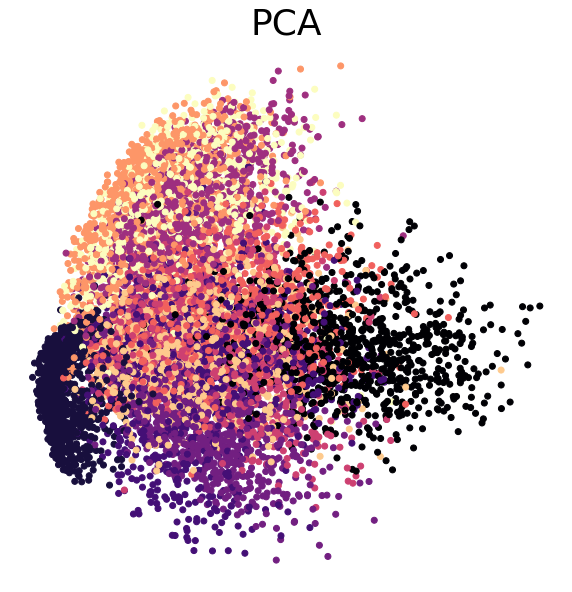

In [246]:
plot_figure(X_reduced, y, "pca")

## t-SNE

In [247]:
tsne = TSNE(n_components=2, random_state=1)
t0 = time.time()
X_reduced = tsne.fit_transform(X)
t1 = time.time()

tsne_time = round(t1-t0, 2)

print("Time taken for t-SNE to fit-transform -", tsne_time)

Time taken for t-SNE to fit-transform - 30.97


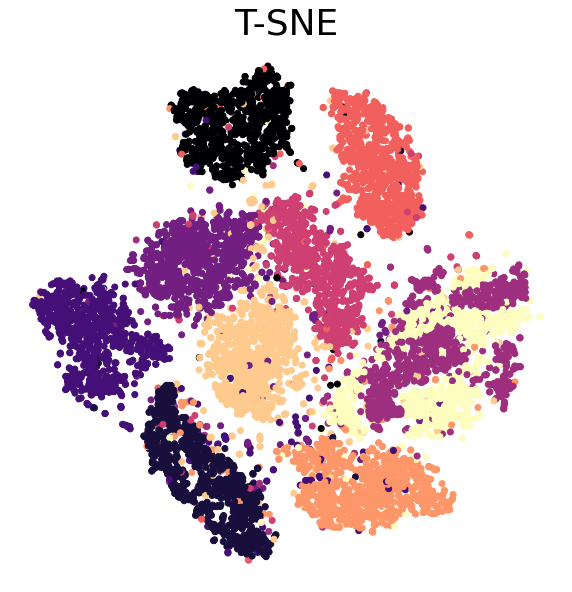

In [248]:
plot_figure(X_reduced, y, "t-sne")

## PCA + t-SNE

In [249]:
pca_tsne_pipeline = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=1)),
    ("tsne", TSNE(n_components=2, random_state=1))
])

t0 = time.time()
X__reduced = pca_tsne_pipeline.fit_transform(X)
t1 = time.time()

pca_tsne_time = round(t1-t0, 2)

print("Time taken for PCA + t-SNE to fit-transform -", pca_tsne_time)

Time taken for PCA + t-SNE to fit-transform - 33.17


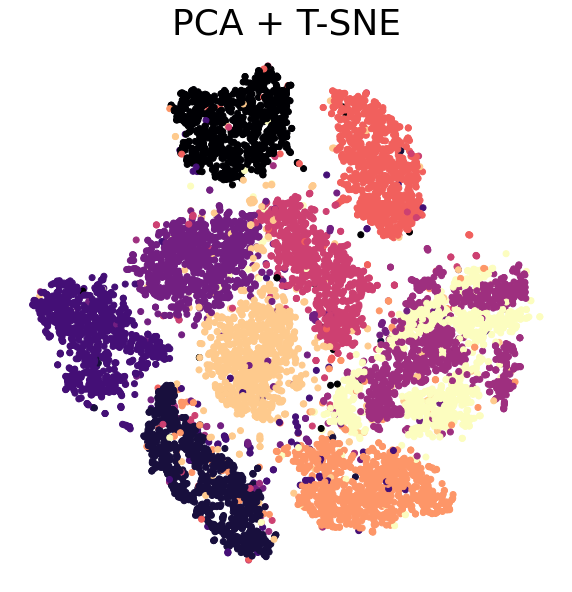

In [250]:
plot_figure(X_reduced, y, "pca + t-sne")

## LLE

In [251]:
lle = LocallyLinearEmbedding(n_components=2, random_state=1)
t0 = time.time()
X_reduced = lle.fit_transform(X)
t1 = time.time()

lle_time = round(t1-t0, 2)

print("Time taken for LLE to fit-transform -", lle_time)

Time taken for LLE to fit-transform - 9.61


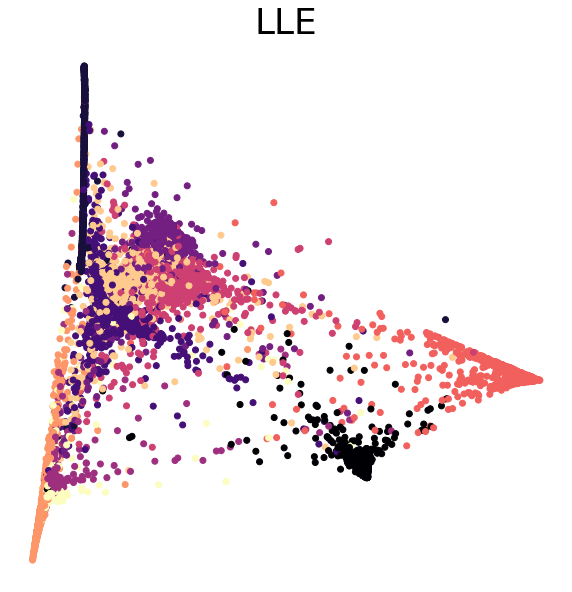

In [252]:
plot_figure(X_reduced, y, "lle")

## PCA + LLE

In [253]:
pca_lle_pipeline = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=1)),
    ("lle", LocallyLinearEmbedding(n_components=2, random_state=1))
])

t0 = time.time()
X__reduced = pca_lle_pipeline.fit_transform(X)
t1 = time.time()

pca_lle_time = round(t1-t0, 2)

print("Time taken for PCA + LLE to fit-transform -", pca_lle_time)

Time taken for PCA + LLE to fit-transform - 11.4


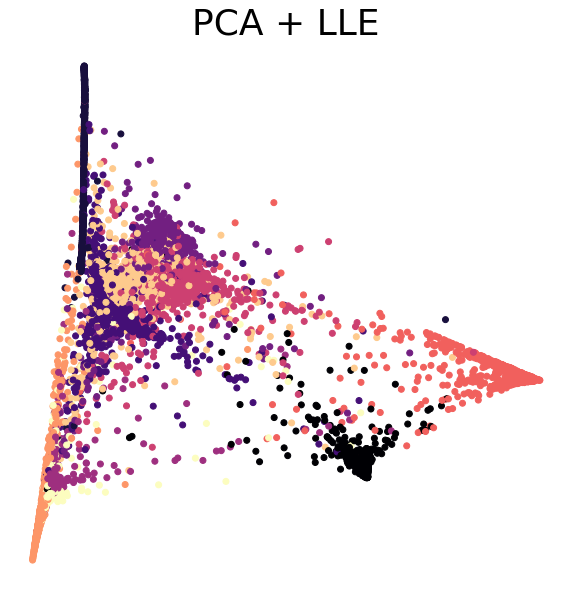

In [254]:
plot_figure(X_reduced, y, "pca + lle")

## MDS

In [255]:
mds = MDS(n_components=2, random_state=1)
t0 = time.time()
X_reduced = mds.fit_transform(X[:2000])
t1 = time.time()

mds_time = round(t1-t0, 2)

print("Time taken for MDS to fit-transform -", mds_time)

Time taken for MDS to fit-transform - 114.68


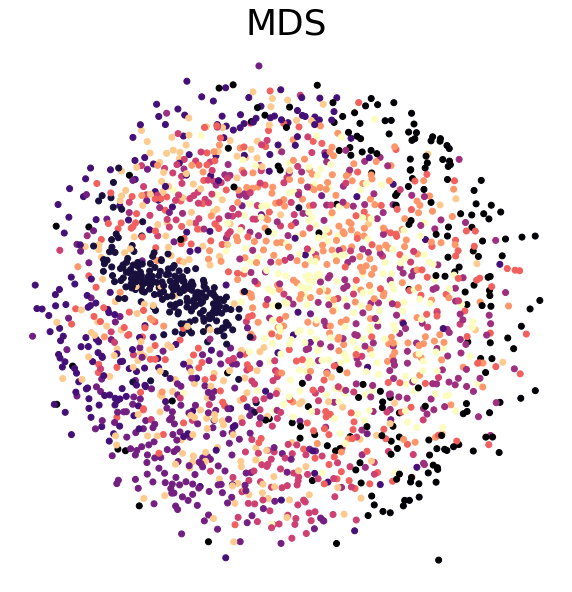

In [256]:
plot_figure(X_reduced, y[:2000], "mds")

## PCA + MDS

In [257]:
pca_mds_pipeline = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=1)),
    ("mds", MDS(n_components=2, random_state=1))
])

t0 = time.time()
X__reduced = pca_mds_pipeline.fit_transform(X[:2000])
t1 = time.time()

pca_mds_time = round(t1-t0, 2)

print("Time taken for PCA + MDS to fit-transform -", pca_mds_time)

Time taken for PCA + MDS to fit-transform - 114.15


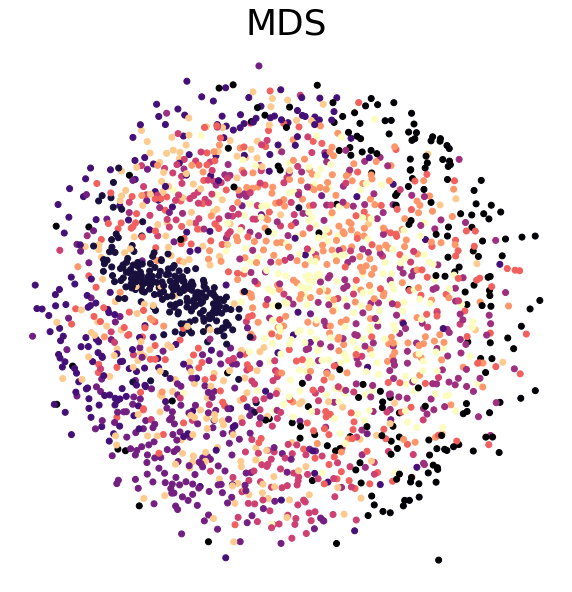

In [258]:
plot_figure(X_reduced, y[:2000], "mds")

## LDA

In [259]:
lda = LinearDiscriminantAnalysis(n_components=2)
t0 = time.time()
X_reduced = lda.fit_transform(X, y)
t1 = time.time()

lda_time = round(t1-t0, 2)

print("Time taken for LDA to fit-transform -", lda_time)

Time taken for LDA to fit-transform - 1.25


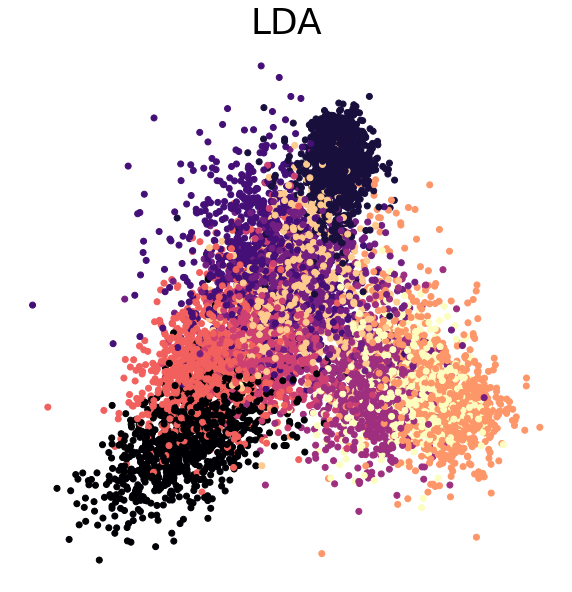

In [260]:
plot_figure(X_reduced, y, "lda")